## Numerical solution of ordinary differential equations: Higher order Runge-Kutta methods

As always, we start by importing some important Python modules.

In [12]:
import numpy as np
from numpy import pi
from numpy.linalg import solve, norm    
import matplotlib.pyplot as plt

newparams = {'figure.figsize': (6.0, 6.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14, 'font.family': 'sans-serif'}
plt.rcParams.update(newparams)

### Runge-Kutta Methods
In the previous lectures we introduced
*Euler's method* and *Heun's method* as
particular instances of the *One Step Methods*,
and we presented the general error theory
for one step method.

In this note we will consider one step methods which go under the name
**Runge-Kutta methods (RKM)**. We will see that Euler's method
and Heun's method are instance of RKMs.
But before we start, we will derive yet another one-step method,
known as *explicit midpoint rule* or
*improved explicit Euler method*.

As for Heun's method, we start from the IVP $y' = f(t, y)$,
integrate over $[t_k, t_{k+1}]$ and
apply the midpoint rule:

$$
y(t_{k+1}) - y(t_k)
= \int_{t_k}^{t_{k+1}} f(t, y(t)){\,\mathrm{d}t}
$$

$$
\approx \tau_k f(t_k + \tfrac{1}{2}\tau_k, y(t_k + \tfrac{1}{2}\tau_k))
$$

Since we cannot determine the value $y(t_k + \tfrac{1}{2}\tau_k)$ from this system,
we borrow an idea from derivation of Heun's method and approximate
it using a half explicit Euler step

$$
y(t_k + \tfrac{1}{2}\tau_k) \approx
y(t_k) + \tfrac{1}{2}\tau_k f(t_k, y(t_k)),
$$

leading to the following one-step methods: Given $y_k, \tau_k$ and $f$, compute

$$
y_{k+1} := y_k + \tau_k f(t_k + \tfrac{1}{2}\tau_k, y_k + \tfrac{1}{2}\tau_k f(t_k, y_k)).
$$(eq:improved_euler)

The nested function expression can again be rewritten using 2 *stage
derivatives*, which leads to the following form of the
**explicit midpoint rule** or
**improved explicit Euler method**:

$$
k_{1} := f(t_k, y_k)
$$

$$
k_{2} := f(t_k + \tfrac{\tau_k}{2}, y_k + \tfrac{\tau_k}{2} k_1)
$$

$$
y_{k+1} := y_k + \tau_k k_2
$$

Oppgave - Analyzing the improved explicit Euler method:

**a)**
Find the increment function $\Phi$ for the improved explicit Euler method.

$$
\Phi(t_k, y_{k}, \tau_{k}) = k_{2} = f(t_k + \tfrac{\tau_k}{2}, y_k + \tfrac{\tau_k}{2} k_1) = f(t_k + \tfrac{\tau_k}{2}, y_k + \tfrac{\tau_k}{2} f(t_k,y_k))
$$


**b)**
Assuming the right-hand side $f$ of a given IVP satisfies a Lipschitz
condition $\| f(t, y) - f(t, z)\| \leqslant L_{f} \| y-z\| $ with a
constant $L_f$ independent of $t$, show that the incremement function
$\Phi$ of the improved Euler method does also satisfies a Lipschitz
condition for some constant $L_{\Phi}$.

**Hint.**
Get some inspiration from the corresponding result for Heun's method derived
in `ErrorAnalysisNuMeODE` notes.

Bruker inkrementfunksjonen, Lipschitz conditionen for $f$ og triangelulikeheten:
\begin{align*}
|\Phi(t,y)-\Phi(t,z)| &= |f\left(t + \frac{\tau}{2}, y + \frac{\tau}{2}f(t,y)\right) - f\left(t + \frac{\tau}{2}, z + \frac{\tau}{2}f(t,z)\right)| 
\\ 
&\leq L_f| y + \frac{\tau}{2}f(t,y) - z - \frac{\tau}{2}f(t,z) |
\\ 
&\leq L_f| y - z  | + L_f\frac{\tau}{2} | f(t,y) - f(t,z) |
\\ 
&\leq L_f| y - z  | + L_f^2\frac{\tau}{2} | y-z |
\\ 
& = (L_f+\frac{\tau}{2}L_f^2)|y-z|
\\ 
& = L_{\Phi}|y-z|.
\end{align*}


**c)**
Show the improved explicit Euler method is consistent of order $2$
if the right-hand side $f$ of a given IVP is in $C^2$.


**Hint.**
Get some inspiration from the corresponding result for Heun's method derived
in `ErrorAnalysisNuMeODE` notes.

Starter med den eksplisitte løsningen som er Taylor expanded og på formen
$$
y(t_0+\tau) = y_0 + \tau f + \frac{\tau^2}{2}(f_t + f_y f) +
\frac{\tau^3}{6}(f_{tt}+2f_{ty}f+f_{yy}f^2 + f_yf_t+ (f_y)^2f
) + \dotsm,
$$

hvor $f$ og alle dens derivater er evaluert i $(t_0,y_0)$.

For den numeriske løsningen har vi

\begin{align*}
  k_1 &= f(t_0,y_0) = f, 
  \\ 
  k_2 &= f(t_0+\frac{\tau}{2}, y_0+\frac{\tau}{2} k_1) 
  \\ 
      & = f + \frac{\tau}{2} f_t + \frac{\tau}{2} k_1 f_y + \frac{\tau^2}{8}f_{tt} + \frac{\tau^2}{4} k_1 f_{ty} + \frac{\tau^2}{8} k_1^2 f_{yy} 
       + \dotsm 
       \\ 
      &= f + \frac{\tau}{2}(f_t + f_y f) + \frac{\tau^2}{8}(f_{tt} + 2f_{ty} f + f_{yy}f^2) + \dotsm
      \\ 
  y_1 &= y_0 + \tau k_2
      = y_0 + \tau (f + \frac{\tau}{2}(f_t + f_y f) + \frac{\tau^2}{8}(f_{tt} + 2f_{ty} f + f_{yy}f^2)) + \dotsm
       \\ 
      &= y_0 + \tau f + \frac{\tau^2}{2}(f_t + f_y f) + \frac{\tau^3}{8}(f_{tt} + 2f_{ty} f + f_{yy}f^2) + \dotsm
\end{align*}

Local trunction error blir da

$$
\eta(t_0, \tau) = y(t_0+\tau)-y_1 = \frac{\tau^3}{24} (f_{tt} + f_{yy} f^2 + 4f_yf_t + 4(f_y)^2f + 2f_{ty}f) + \dotsm,
$$

og det er mulig å konkludere at det er en konstant $D$ slik at $\max_i |\eta(t_i, \tau)| \leq D\tau^3$, noe som gir consistency order $2$.

-------------------------------------------------------------

Recall that the **explicit Euler method** is defined by

\begin{align}
k_{1} &:= f(t_k, y_k)
\\
y_{k+1} &:= y_k + \tau_k  k_1
\end{align}

And **Heun's method** or **explicit trapezoidal rule** is similar to the improved explicit Euler method given by

\begin{align}
k_{1} &:= f(t_k, y_k)
\\
k_{2} &:= f(t_k + \tau_k, y_k + \tau_k k_1)
\\
y_{k+1} &:= y_k + \tau_k ( \tfrac{1}{2} k_1  + \tfrac{1}{2} k_2 ) 
\end{align}

Note that for all schemes so far, we are able to successively compute the stage derivatives,
starting from $k_1 = f(t_k, y_{k})$.

This is not the case for the last one-step method we encountered so far,
namely the **implicit trapezoidal rule** or **Crank-Nicolson method**:

$$
y_{k+1} := y_k + \tau_k (\tfrac{1}{2} \underbrace{f(t_k, y_k)}_{:=k_1} + \tfrac{1}{2}
\underbrace{f(t_k+\tau_k, y_{k+1}))}_{:= k_2}
$$

Using stage derivatives, we obtain this time

\begin{align}
k_{1} := f(t_k, y_k)
\\
k_{2} := f(t_k + \tau_k, y_{k} + \tau (\tfrac{1}{2}k_1 + \tfrac{1}{2} k_2)) 
\\
y_{k+1} := y_k + \tau_k ( \dfrac{1}{2} k_1  + \dfrac{1}{2} k_2 ) 
\end{align}

The previous examples and the wish for constructing higher ($> 2$) one-step methods
leads to following definition

Definisjon - Runge-Kutta:

Given $b_j$, $c_j$, and $a_{jl}$ for $j,l = 1,\ldots s$, a Runge-Kutta method is
defined by the recipe

\begin{align}
k_{j} &:=
f(t_k + c_j \tau, y_i +  \tau_k \sum_{l=1}^{s} {a}_{jl} k_l)
\quad
j = 1,\ldots s,
\\
y_{k+1} &:= y_{k} + \tau_k \sum_{j=1}^s b_j k_j
\end{align}

Runge-Kutta schemes are often specified in the form of a **Butcher table**:

<font color=LightSkyBlue>

$$
\begin{array}{c|ccc}
c_1 & a_{11} & \cdots & a_{1s}
\\ 
\vdots & \vdots & & \vdots
\\ 
c_s & a_{s1} & \cdots & a_{ss}
\\ 
\hline
& b_1 & \cdots & b_s
\end{array}
$$

</font>

If $a_{ij} = 0$ for $j \geqslant i$ the Runge-Kutta method is called **explicit**
as the stages $k_i$ are defined explicitly and can be computed successively:

$$
k_1 := f(t_k + c_1 \tau_k, y_k)
$$

$$
k_2 := f(t_k + c_2 \tau_k, y_k + \tau_k a_{21} k_1)
$$

$$
k_3 := f(t_k + c_3 \tau_k, y_k + \tau_k a_{31} k_1 + \tau a_{32} k_2)
$$

$$
\vdots 
$$


$$
k_j := f(t_k + c_j \tau_k, y_k + \tau_k \sum_{l=1}^{j-1} a_{jl} k_l)
$$

$$
\vdots 
$$

$$
k_s := f(t_k + c_s \tau_k, y_k + \tau_k \sum_{l=1}^{s-1} a_{sl} k_l)
$$

$$
y_{k+1} := y_{k} + \tau \sum_{j=1}^s b_j k_j
$$

Oppgave - Butcher tables for some well-known Runge-Kutta methods:

Write down the Butcher table for the
1. explicit Euler

$$
\begin{array}{c|c}
0 & 0
\\ 
\hline
& 1
\end{array}
$$

2. Heun's method (explicit trapezoidal rule)

$$
\begin{array}{c|cc}
0 & 0 & 0 \\ 1 & 1 & 0 \\ \hline & \frac{1}{2} & \frac{1}{2} 
\end{array}
$$

3. Crank-Nicolson (implicit trapezoidal rule)

$$
\begin{array}{c|cc}
0 & 0 & 0 \\ 1 & \dfrac{1}{2} & \dfrac{1}{2} \\ \hline & \frac{1}{2} & \frac{1}{2} 
\end{array}
$$

4. improved explicit Euler method (explicit midpoint rule)

$$
\begin{array}{c|c c}
0 & 0 & 0
\\ 
\tfrac{1}{2} & \tfrac{1}{2} & 0
\\ 
\hline
& 0 & 1
\end{array}
$$

Crank-Nicolson-metoden har $a_{22} \neq 0$ som betyr at den er implisitt.


We show a verbose solution for explicit Euler, improved explicit Euler and Crank-Nicolson.

**Explicit Euler method**: Since we have only one stage derivative,
this is an example of a 1-stage Runge-Kutta method (s=1). Looking
at the definition of the stage and the final step, we see that

$$
k_{1} := f(t_k, y_k) = f(t_k + \underbrace{0}_{c_1} \cdot \tau_k, y_k + \tau_k \underbrace{0}_{a_{11}} \cdot k_1) \Rightarrow c_1 = a_{11} = 0
$$

$$
y_{k+1} := y_k + \tau_k k_1 =  y_k + \tau_k \underbrace{1}_{b_1}\cdot k_1 \Rightarrow  b_1 = 1
$$

Thus, the Butcher table is

$$
\boldsymbol{\mathrm{B})}
\quad
\begin{array}{c|c}
0 & 0
\\ 
\hline
& 1
\end{array}
$$

**Improved explicit Euler method**: Since we have to stage derivatives,
this is an example of a 2-stage Runge-Kutta method (s=2). Looking
at the definition of the stages and the final step, we see that

$$
k_{1} := f(t_k, y_k) = f(t_k + \underbrace{0}_{c_1} \cdot \tau_k, y_k + \tau_k \underbrace{0}_{a_{11}} \cdot k_1 + \tau_k \underbrace{0}_{a_{21}} \cdot k_2) \Rightarrow c_1 = a_{11} = a_{21} = 0
$$

$$
k_{2} := f(t_k + \tfrac{\tau_k}{2}, y_k + \tfrac{\tau_k}{2} k_1)
$$

$$
      \phantom{:}= f(t_k + \underbrace{\tfrac{1}{2}}_{c_2}\tau_k, y_k + \tau_k\underbrace{\tfrac{1}{2}}_{a_{21}} \cdot k_1 + \tau_k \underbrace{0}_{a_{22}} \cdot k_2) \Rightarrow c_2 = \tfrac{1}{2}, a_{21} = \tfrac{1}{2}, a_{22} = 0
$$

$$
y_{k+1} := y_k + \tau_k k_2 =  y_k + \tau_k \underbrace{0}_{b_1}\cdot k_1  \tau_k \underbrace{1}_{b_2} \cdot k_2 \Rightarrow  b_1 = 0, b_2 = 1
$$

Thus, the Butcher table is

$$
\boldsymbol{\mathrm{A})}
\quad
\begin{array}{c|c c}
0 & 0 & 0
\\ 
\tfrac{1}{2} & \tfrac{1}{2} & 0
\\ 
\hline
& 0 & 1
\end{array}
$$

**Crank-Nicolson method**: Since we have to stage derivatives,
this is an example of a 2-stage Runge-Kutta method (s=2). Looking
at the definition of the stages and the final step, we see that

$$
k_{1} := f(t_k, y_k) = f(t_k + \underbrace{0}_{c_1} \cdot \tau_k, y_k + \tau_k \underbrace{0}_{a_{11}} \cdot k_1 + \tau_k \underbrace{0}_{a_{21}} \cdot k_2) \Rightarrow c_1 = a_{11} = a_{21} = 0
$$

$$
k_{2} := f(t_k + \tau_k, y_{k} + \tau_k \tfrac{1}{2}k_1 + \tau_k \tfrac{1}{2} k_2)
$$

$$
\phantom{:}= f(t_k + \underbrace{1}_{c_1}\cdot\tau_k, y_{k} + \tau_k \underbrace{\tfrac{1}{2}}_{a_{21}} k_1 + \tau_k \underbrace{\tfrac{1}{2}}_{a_{22}} k_2)
\Rightarrow c_1 = 1, a_{21} = a_{22} = \tfrac{1}{2}
$$

$$
y_{k+1} := y_k + \tau_k ( \dfrac{1}{2} k_1  + \dfrac{1}{2} k_2 )
 = y_k + \tau_k \underbrace{\dfrac{1}{2}}_{b_1} k_1  + \tau_k \underbrace{\dfrac{1}{2}}_{b_2} k_2
$$

Thus, the Butcher table is

$$
\boldsymbol{\mathrm{D})}
\quad
\begin{array}{c|cc}
0 & 0 & 0 \\ 1 & \dfrac{1}{2} & \dfrac{1}{2} \\ \hline & \frac{1}{2} & \frac{1}{2} 
\end{array}
$$

<font color=LightSkyBlue>

### Implementation of explicit Runge-Kutta methods

</font>

Below you will find the implementation a general
solver class
`ExplicitRungeKutta`
which at its initialization takes
in a  Butcher table and has `__call__` function

```python
        def __call__(self, y0, f, t0, T, n):
```

and can be used like this

```python
        # Define Butcher table
        a = np.array([[0, 0, 0],
                      [1.0/3.0, 0, 0],
                      [0, 2.0/3.0, 0]])
        
        b = np.array([1.0/4.0, 0, 3.0/4.0])
        
        c = np.array([0,
                      1.0/3.0,
                      2.0/3.0])
        
        # Define number of time steps
        n = 10
        
        # Create solver using the Butcher table
        rk3 = ExplicitRungeKutta(a, b, c)
        
        # Solve problem (applies __call__ function)
        ts, ys = rk3(y0, t0, T, f, Nmax)
```

The complete implementation is given here:

In [8]:
class ExplicitRungeKutta:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def __call__(self, y0, t0, T, f, Nmax):
        # Extract Butcher table
        a, b, c = self.a, self.b, self.c
        
        # Stages
        s = len(b)
        ks = [np.zeros_like(y0, dtype=np.double) for s in range(s)]

        # Start time-stepping
        ys = [y0]
        ts = [t0]
        dt = (T - t0)/Nmax
        
        while(ts[-1] < T):
            t, y = ts[-1], ys[-1]
            
            # Compute stages derivatives k_j
            for j in range(s):
                t_j = t + c[j]*dt
                dY_j = np.zeros_like(y, dtype=np.double)
                for l in range(j):
                    dY_j += dt*a[j,l]*ks[l]

                ks[j] = f(t_j, y + dY_j)
                
            # Compute next time-step
            dy = np.zeros_like(y, dtype=np.double)
            for j in range(s):
                dy += dt*b[j]*ks[j]
            
            ys.append(y + dy)
            ts.append(t + dt)
            
        return (np.array(ts), np.array(ys))


Eksempel - Implementation and testing of the improved Euler method:
We implement the **improved explicit Euler** from above and plot the
analytical and the numerical solution.  To determine the experimental
order of convergence, we use again the `compute_eoc` function.

In [9]:
def compute_eoc(y0, t0, T, f, Nmax_list, solver, y_ex):
    errs = [ ]
    for Nmax in Nmax_list:
        ts, ys = solver(y0, t0, T, f, Nmax)
        ys_ex = y_ex(ts)
        errs.append(np.abs(ys - ys_ex).max())
        print("For Nmax = {:3}, max ||y(t_i) - y_i||= {:.3e}".format(Nmax,errs[-1]))

    errs = np.array(errs)
    Nmax_list = np.array(Nmax_list)
    dts = (T-t0)/Nmax_list

    eocs = np.log(errs[1:]/errs[:-1])/np.log(dts[1:]/dts[:-1])

    # Insert inf at beginning of eoc such that errs and eoc have same length 
    eocs = np.insert(eocs, 0, np.inf)

    return errs, eocs


Here is the implementation of the full example.

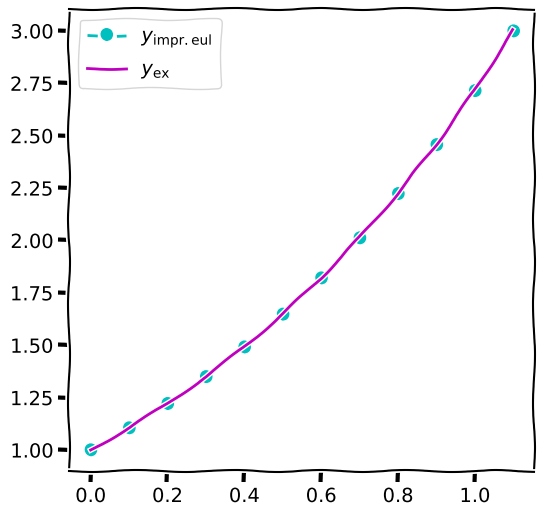

For Nmax =   4, max ||y(t_i) - y_i||= 2.343e-02
For Nmax =   8, max ||y(t_i) - y_i||= 6.441e-03
For Nmax =  16, max ||y(t_i) - y_i||= 1.688e-03
For Nmax =  32, max ||y(t_i) - y_i||= 4.322e-04
For Nmax =  64, max ||y(t_i) - y_i||= 1.093e-04
For Nmax = 128, max ||y(t_i) - y_i||= 2.749e-05


,Error,EOC
0,0.023426,inf
1,0.006441,1.862854
2,0.001688,1.931616
3,0.000432,1.965957
4,0.000109,1.983031
5,0.000027,1.991530


In [13]:
# Define Butcher table for improved Euler
a = np.array([[0,   0],
              [0.5, 0]])
b = np.array([0, 1])
c = np.array([0, 0.5])

# Create a new Runge Kutta solver
rk2 = ExplicitRungeKutta(a, b, c)

t0, T = 0, 1
y0 = 1
lam = 1
Nmax = 10

# rhs of IVP
f = lambda t,y: lam*y

# the solver can be simply called as before, namely as function:
ts, ys = rk2(y0, t0, T, f, Nmax)

plt.figure()
plt.plot(ts, ys, "c--o", label=r"$y_{\mathrm{impr.eul}}$")

# Exact solution to compare against
y_ex = lambda t: y0*np.exp(lam*(t-t0))

# Plot the exact solution (will appear in the plot above)
plt.plot(ts, y_ex(ts), "m-", label=r"$y_{\mathrm{ex}}$")
plt.legend()
plt.show()

# Run an EOC test
Nmax_list = [4, 8, 16, 32, 64, 128]

errs, eocs = compute_eoc(y0, t0, T, f, Nmax_list, rk2, y_ex)

# Do a pretty print of the tables using panda

import pandas as pd
from IPython.display import display

table = pd.DataFrame({'Error': errs, 'EOC' : eocs})
display(table)


Oppgave - The classical 4-stage Runge-Kutta method:

While the term Runge-Kutta methods nowadays refer to the general
scheme defined above, particular schemes
in the "early days" were named by their inventors, and there exists
also the the classical 4-stage Runge-Kutta method which is defined by

$$
\begin{array}{c|cccc}
      0 & 0 & 0 & 0 & 0\\ \frac{1}{2} &  \frac{1}{2} & 0 & 0 & 0\\ \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0\\ 1 &  0 & 0 & 1 & 0 \\ \hline & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
    \end{array}
$$

**a)**
Starting from this Butcher table, write down the explicit formulas for computing $k_1,\ldots, k_4$
and $y_{k+1}$.

**b)**
Build a solver based on the classical Runge-Kutta method using the `ExplicitRungeKutta` class
and determine the convergence order experimentally.

$$
\begin{align*}
k_1 &= f(t_k, y_k)\newline
k_2 &= f(t_k + \frac{1}{2}\tau_{k}, y_k + \tau_{k} \frac{1}{2}k_1)\newline
k_3 &= f(t_k + \frac{1}{2}\tau_{k}, y_k + \tau_{k} \frac{1}{2}k_2)\newline
k_4 &= f(t_k + \tau_{k}, y_k + \tau_{k} k_3)\newline
y_{k+1} &= y_k + \tau_{k} (\frac{1}{6} k_1 + \frac{1}{3} k_2 + \frac{1}{3} k_3 + \frac{1}{6} k_4)
\end{align*}
$$

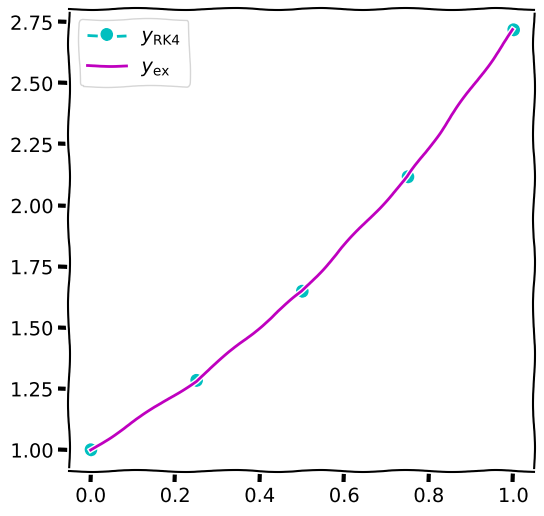

In [14]:
# Insert your code here

# Define Butcher table for improved Euler
a = np.array([[0,   0,   0,  0],
              [1/2, 0,   0,  0],
              [0,   1/2, 0,  0],
              [0,   0,   1,  0]])
b = np.array([1/6, 1/3, 1/3, 1/6])
c = np.array([0, 1/2, 1/2, 1])

# Create a new Runge Kutta solver
rk4 = ExplicitRungeKutta(a, b, c)

t0, T = 0, 1
y0 = 1
lam = 1
Nmax = 4

# the solver can be simply called as before, namely as function:
ts, ys = rk4(y0, t0, T, f, Nmax)

plt.figure()
plt.plot(ts, ys, "c--o", label=r"$y_{\mathrm{RK4}}$")
plt.plot(ts, y_ex(ts), "m-", label=r"$y_{\mathrm{ex}}$")
plt.legend()
plt.show()


In [15]:
# Run an EOC test
Nmax_list = [4, 8, 16, 32, 64, 128]
errs, eocs = compute_eoc(y0, t0, T, f, Nmax_list, rk4, y_ex)
table = pd.DataFrame({'Error': errs, 'EOC' : eocs})
display(table)


For Nmax =   4, max ||y(t_i) - y_i||= 7.189e-05
For Nmax =   8, max ||y(t_i) - y_i||= 4.984e-06
For Nmax =  16, max ||y(t_i) - y_i||= 3.281e-07
For Nmax =  32, max ||y(t_i) - y_i||= 2.105e-08
For Nmax =  64, max ||y(t_i) - y_i||= 1.333e-09
For Nmax = 128, max ||y(t_i) - y_i||= 8.384e-11


,Error,EOC
0,7.188926e-05,inf
1,4.984042e-06,3.850388
2,3.281185e-07,3.925028
3,2.104785e-08,3.962472
4,1.332722e-09,3.981225
5,8.384093e-11,3.990577


For the **explicit** Runge-Kutta methods, the $s\times s$ matrix is in fact just a lower left triangle
matrix, and often, the $0\text{s}$ in the diagonal and upper right triangle are simply omitted.
So, the Butcher table for the classical Runge-Kutta method reduces to

$$
\begin{array}{c|cccc}
       0 &  &  &  & \\ 
       \frac{1}{2} &  \frac{1}{2} &  &  &
       \\ \frac{1}{2} & 0  & \frac{1}{2} &  &
       \\ 1 & 0  & 0 & 1 &  \\ \hline
       & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
    \end{array}
$$

If $f$ depends only on $t$ but not on $y$, the ODE $ y' = f(t, y) = f(t)$
reduces to a simpe integration problem, and in this case
the classical Runge-Kutta methods reduces to the classical Simpson's rule
for numerical integration.

More generally, when applied to simple integration problems, Runge-Kutta methods
reduces to various quadrature rules over the interval 
$ [t_i, t_{i+1}]$ with $s$ quadrature points, 
where the integration points $\{\xi_j\}_{i=1}^s$ 
and correspond weights $\{w_i\}_{i=1}^s$
of the quadrature rules are given by respectively 
$\xi_i = t_i + c_j\tau$, $w_i = b_i$ for $j=1,\ldots,s$

See this [wiki page](https://en.wikipedia.org/wiki/List\_of\_Runge-Kutta\_methods)
for a list of various Runge-Kutta methods.

### Runge-Kutta Methods via Numerical Integration
This section provides a supplemental and more in-depth motivation of how to
arrive at the general concept of Runge-Kutta methods via numerical integration,
similar to the ideas we already presented when we derived Crank-Nicolson, Heun's method
and the explicit trapezoidal rule.

For a given time interval $I_i = [t_i, t_{i+1}]$ we
want to compute $y_{i+1}$ assuming that $y_i$ is given.
Starting from the exact expression

$$
y(t_{i+1}) - y(t_i) =  \int_{t_i}^{t_{i+1}} y(t)'{\,\mathrm{d}t} = \int_{t_i}^{t_{i+1}} f(t, y(t)){\,\mathrm{d}t},
$$

the idea is now to approximate the integral by some quadrature
rule $\mathrm{Q}[\cdot](\{\xi_j\}_{j=1}^s,\{b_j\}_{j=1}^s)$ defined on $I_i$.
Then we get

$$
y(t_{i+1}) - y(t_i) = \int_{t_i}^{t_{i+1}} f(t, y(t)){\,\mathrm{d}t}
$$

$$
\approx \tau \sum_{j=0}^s b_j f(\xi_j, y(\xi_j))
$$

Now we can define $\{c_j\}_{j=1}^s$ such that  $\xi_j = t_{i} + c_j \tau$
for $j=1,\ldots,s$

Oppgave - A first condition on $b_j$:

**Question:** What value do you expect for $\sum_{j=1}^s b_{j}$?

**Choice A:**
 $\sum_{j=1}^s b_{j} = \tau$

**Choice B:**
 $\sum_{j=1}^s b_{j} = 0$

**Choice C:**
 $\sum_{j=1}^s b_{j} = 1$

The correct answer is **C**

In contrast to pure numerical integration, we don't know the values
of $y(\xi_j)$. Again, we could use the same idea to approximate

$$
y(\xi_j) - y(t_i) =\int_{t_i}^{t_i+c_j \tau} y'(t){\,\mathrm{d}t} = \int_{t_i}^{t_i+c_j \tau} f(t, y(t)){\,\mathrm{d}t}
$$

but then again we get a closure problem if we choose new quadrature points.
The idea is now to **not introduce even more new quadrature points** but to
use same $y(\xi_j)$ to avoid the closure problem.
Note that this leads to an approximation of the integrals $\int_{t_i}^{t_i+c_j \tau}$
with possible nodes **outside** of $[t_i, t_i + c_j \tau ]$.

This leads us to

$$
y(\xi_j) - y(t_i) = \int_{t_i}^{t_i+c_j \tau} f(t, y(t)){\,\mathrm{d}t}
$$

$$
\approx c_j \tau \sum_{l=1}^{s}
\tilde{a}_{jl}
f(\xi_l, y(\xi_l))
$$

$$
=
\tau \sum_{l=1}^{s}
{a}_{jl}
f(\xi_l, y(\xi_l))
$$

where we set $ c_j  \tilde{a}_{jl} = a_{jl}$.

Oppgave - A first condition on $a_{jl}$:

**Question:** What value do you expect for $\sum_{l=1}^s a_{jl}$?

**Choice A:**
 $\sum_{l=1}^s a_{jl} =  \tfrac{1}{c_j}$

**Choice B:**
 $\sum_{l=1}^s a_{jl} =  c_j $

**Choice C:**
 $\sum_{l=1}^s a_{jl} =  1 $

**Choice D:**
 $\sum_{l=1}^s a_{jl} =  \tau $

The correct answer is **B**

The previous discussion leads to the following alternative but equivalent definition
of Runge-Kutta derivatives via *stages* $Y_j$ (and not stage derivatives $k_j$):

Definisjon - Runge-Kutta methods using stages $\{Y_l\}_{l=1}^s$:

Given $b_j$, $c_j$, and $a_{jl}$ for $j,l = 1,\ldots s$, the Runge-Kutta method is
defined by the recipe

\begin{align*}
Y_{j}
&:= y_i +  \tau \sum_{l=1}^{s} {a}_{jl}
f(t_i + c_l \tau, Y_l) \quad \text{for } j = 1,\ldots s,
\\
y_{i+1} &:= y_i + \tau \sum_{j=1}^s b_j f(t_i + c_j \tau, Y_j)
\end{align*} 

Note that in the final step, all the function evaluation we need
to perform have already been performed when computing $Y_j$.

Therefore one often rewrite the scheme by introducing **stage derivatives** $k_l$

\begin{align}
k_j
&:= f(t_i + c_j \tau, Y_j)
\\
&= f(t_i + c_j \tau, y_i +  \tau \sum_{l=1}^{s} {a}_{jl}
k_l) \quad
j = 1,\ldots s,
\end{align}

so the resulting scheme will be

\begin{align}
k_{j} &:=
f(t_i + c_j \tau, y_i +  \tau \sum_{l=1}^{s} {a}_{jl} k_l)
\quad
j = 1,\ldots s,
\\
y_{i+1} &:= y_{i} + \tau \sum_{j=1}^s b_j k_j
\end{align}
which is exactly what we used as definition for general Runge-Kutta methods in the
previous section.

### Convergence of Runge-Kutta Methods
The convergence theorem for one-step methods
gave us some necessary conditions to guarantee
that a method is convergent order of $p$:
"consistency order $p$" + "Increment function satisfies a Lipschitz condition"
$\Rightarrow$
"convergence order $p$.

"local truncation error behaves like $\mathcal{O}(\tau^{p+1})$" + "Increment function satisfies a Lipschitz condition"
$\Rightarrow$
"global truncation error behaves like $\mathcal{O}(\tau^{p})$"

It turns out that for $f$ is at least $C^1$ with respect to all
its arguments then the increment function $\Phi$
associated with any Runge-Kutta methods satisfies
a Lipschitz condition. The next theorem provides
us a simple way to check whether a given Runge-Kutta
(up to 4 stages) attains a certain consistency order.

Teorem - Order conditions for Runge-Kutta methods:

Let the right-hand side $f$ of an IVP be of $C^p$.
Then a Runge-Kutta method has consistency order $p$ if and only if all the
conditions up to and including $p$ in the table below are satisfied.

$$
\begin{array}{|c|c|c}
   \hline
   p  & \text{conditions}  \\ \hline 
   1 & \sum_{i=1}^s b_i = 1 \\ \hline 
  2 & \sum_{i=1}^s b_i c_i = 1/2 \\ \hline 
  3 & \sum_{i=1}^s b_i c_i^2 = 1/3\\ 
   & \sum_{i,j=1}^s b_i a_{ij} c_j = 1/6 
  \\ \hline 
  4 & \sum_{i=1}^s b_ic_i^3=1/4 \\ 
  & \sum_{i,j=1}^s b_i c_i a_{ij}c_j=1/8 \\ 
  & \sum_{i,j=1}^s b_i a_{ij}c_j^2=1/12 \\ 
  & \sum_{i,j,k=1}^s b_i a_{ij} a_{jk} c_k = 1/24 \\ \hline 
\end{array}
$$

where sums are taken over all the indices from 1 to $s$.

Bevis:

We don't present a proof, but the most straight-forward approach is similar to the way we show that Heun's method and the improved Euler's method
are consistent of order 2: You perform a Taylor-expansion of the real solution and express all derivatives of $y(t)$ in terms of derivatives 
of $f$ by invoking the chain rule. Then you perform Taylor expansion of the various stages in the Runge-Kutta methods and gather all terms with the
the same $\tau$ order. To achieve a certain consistency order $p$, the terms paired with $\tau^k$, $k=0,\ldots,p$ in the Taylor-expansion of the discrete solution must match the corresponding terms of the exact solution, which in turn will lead to certain condition for $b_j, c_j$ and $a_{ij}$. 

Of course, this get quite cumbersome for higher order methods, and luckily there is a beautiful theory, will tells you how to do Taylor-expansion
of the discrete and exact solution in term of derivatives of $f$ in very structured manner.

Oppgave - Applying order conditions to Heun's method:

Apply the conditions to Heun's method, for which $s=2$ and the Butcher tableau is

$$
\begin{array}{c|cc} 
c_1 & a_{11} & a_{12} \\ c_2 & a_{21} & a_{22} \\ \hline & b_1 & b_2 
\end{array}
=
\begin{array}{c|cc}
0 & 0 & 0 \\ 1 & 1 & 0 \\ \hline & \frac{1}{2} & \frac{1}{2} 
\end{array}.
$$

The order conditions are:

\begin{align*}
p&=1 & b_1 + b_2 &= \frac{1}{2} + \frac{1}{2}= 1 && \text{OK} \\ \\ \hline \\ 
p&=2 & b_1c_1 + b_2 c_2 &= \frac{1}{2}\cdot 0 + \frac{1}{2}\cdot 1 = \frac{1}{2} && \text{OK}\\  \\ \hline \\ 
p&=3 & b_1c_1^2 + b_2c_2^2 &= \frac{1}{2}\cdot 0^2 + \frac{1}{2}\cdot 1^2 = \frac{1}{2} \not= \frac{1}{3} && \text{Not satisfied} \\ 
 &   & b_1(a_{11}c_1+a_{12}c_2)+b_2(a_{21}c_1+a_{22}c_2) &= \frac{1}{2}(0\cdot0 + 0\cdot 1) + \frac{1}{2}(1\cdot 0 + 0\cdot 1) \\ 
      &&&= 0 \not=\frac{1}{6} && \text{Not satisfied}
\end{align*}

The method is of order 2.

Oppgave - Applying order conditions to the classical Runge-Kutta method:

In our numerical experiment earlier, we observed that
classical 4-stage Runge-Kutta method defined by

$$
\begin{array}{c|cccc}
      0 & 0 & 0 & 0 & 0\\ \frac{1}{2} &  \frac{1}{2} & 0 & 0 & 0\\ \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0\\ 1 &  0 & 0 & 1 & 0 \\ \hline & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
    \end{array}
$$

had convergence order 4. Now use the order conditions to show, that this method indeed has **consistency order** 4.

\begin{align*}
p&=1 & b_1 + b_2 + b_3 + b_4 &= \frac{1}{6} + \frac{1}{3} + \frac{1}{3} + \frac{1}{6}= 1 && \text{OK} \\ \\ \hline \\ 
p&=2 & b_1c_1 + b_2 c_2 + b_3c_3 + b_4c_4 &= \frac{1}{6}\cdot 0 + \frac{1}{3}\cdot \frac{1}{2} + \frac{1}{3}\cdot \frac{1}{2} + \frac{1}{6}\cdot 1 = \frac{1}{2} && \text{OK}\\  \\ \hline \\ 
p&=3 & b_1c_1^2 + b_2c_2^2 + b_3c_3^2 + b_4c_4^2 &= \frac{1}{6}\cdot 0^2 + \frac{1}{3}\cdot \frac{1}{2}^2 + \frac{1}{3}\cdot \frac{1}{2}^2 + \frac{1}{6}\cdot 1^2 = \frac{1}{3} && \text{OK}\\
 &   & b_1(a_{11}c_1+a_{12}c_2+a_{13}c_3+a_{14}c_4) + b_2(a_{21}c_1+a_{22}c_2+a_{23}c_3+a_{24}c_4) + \\
 &   & b_3(a_{31}c_1+a_{32}c_2+a_{33}c_3+a_{34}c_4) + b_4(a_{41}c_1+a_{42}c_2+a_{43}c_3+a_{44}c_4) &= 0 + 0 + \frac{1}{3}(0 + \frac{1}{2}\cdot \frac{1}{2} + 0 + 0) + \frac{1}{6}(0 + 0 + 1\cdot \frac{1}{2} + 0) = \frac{1}{6} && \text{OK}\\ \\ \hline \\
 &   & \text{osv. for } p=4
\end{align*}

Teorem - Convergence theorem for Runge-Kutta methods:

Given the IVP ${\boldsymbol y}' = {\boldsymbol f}(t, {\boldsymbol y}), {\boldsymbol y}(0) = {\boldsymbol y}_0$.
Assume $f \in C^p$ and that a given Runge-Kutta method satisfies
the order conditions
up to order $p$.
Then the Runge-Kutta method is convergent of order $p$.

Bevis:

We only sketch the proof. First, the method has consistency order $p$ thanks to the fullfilment of the order condition. Thus,
we only need to show that the increment function $\Phi$ satisfies a Lipschitz condition.
This can be achieved by employing a similar "bootstrapping" argument we used when proved that the increment function associated with the Heun's method satisfies a Lipschitz condition.